In [1]:
%matplotlib inline
import cartopy.crs as ccrs
from typhon.plots.maps import get_cfeatures_at_scale
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [2]:
def plot_file(casename):
    if casename == 'allCFCs':
        physics_id = 1
    elif casename == 'allCFCs_LM':
        physics_id = 2
    else:
        raise runtime_error('unknown case')
    fig = plt.figure(figsize=[20, 15])

    subcases = ['rld', 'rlu']
    for axid, subcase in enumerate(subcases):
        ax = plt.subplot(len(subcases), 1, axid+1,
                         projection=ccrs.PlateCarree())
        features = get_cfeatures_at_scale(scale='50m')
        ax.add_feature(features.BORDERS)
        ax.add_feature(features.COASTLINE)
        filename = f'out/{subcase}_Efx_ARTS-2-3_rad-irf_r1i1p{physics_id}f1_gn.nc'
        with Dataset(filename, 'r') as ds:
            cax = ax.scatter(ds['lon'][:], ds['lat'][:],
                            s=180, c=ds[subcase][:][0, :, -1], cmap='temperature')
            print(ds['plev'][:][0,-1])
        plt.title(f'{subcase} {casename} {filename}')
        plt.colorbar(cax, ax=ax)

In [3]:
for subcase in ['rld','rlu']:
    with Dataset(f'out/{subcase}_Efx_ARTS-2-3_rad-irf_r1i1p1f1_gn.nc', 'r') as ds:
        allcfcs = ds[subcase][:]
    with Dataset(f'out/{subcase}_Efx_ARTS-2-3_rad-irf_r1i1p2f1_gn.nc', 'r') as ds:
        allcfcslm = ds[subcase][:]
    print(subcase, 'diff:', np.max(allcfcs - allcfcslm))

rld diff: 1.0576172
rlu diff: 0.06726074


85296.32
85296.32


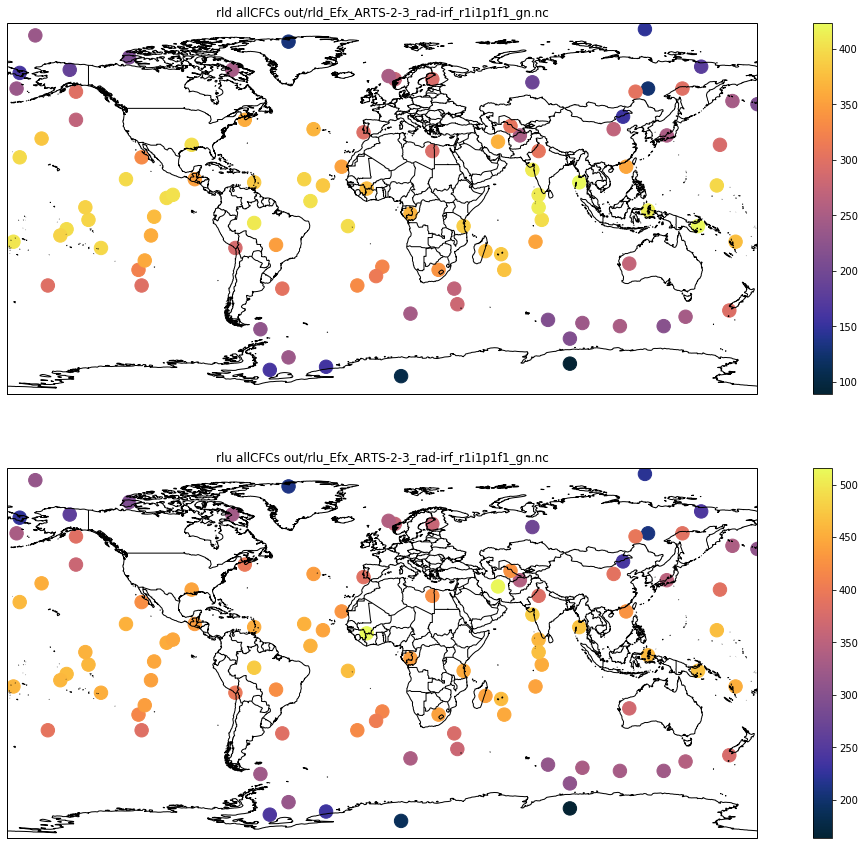

In [4]:
plot_file('allCFCs')

85296.32
85296.32


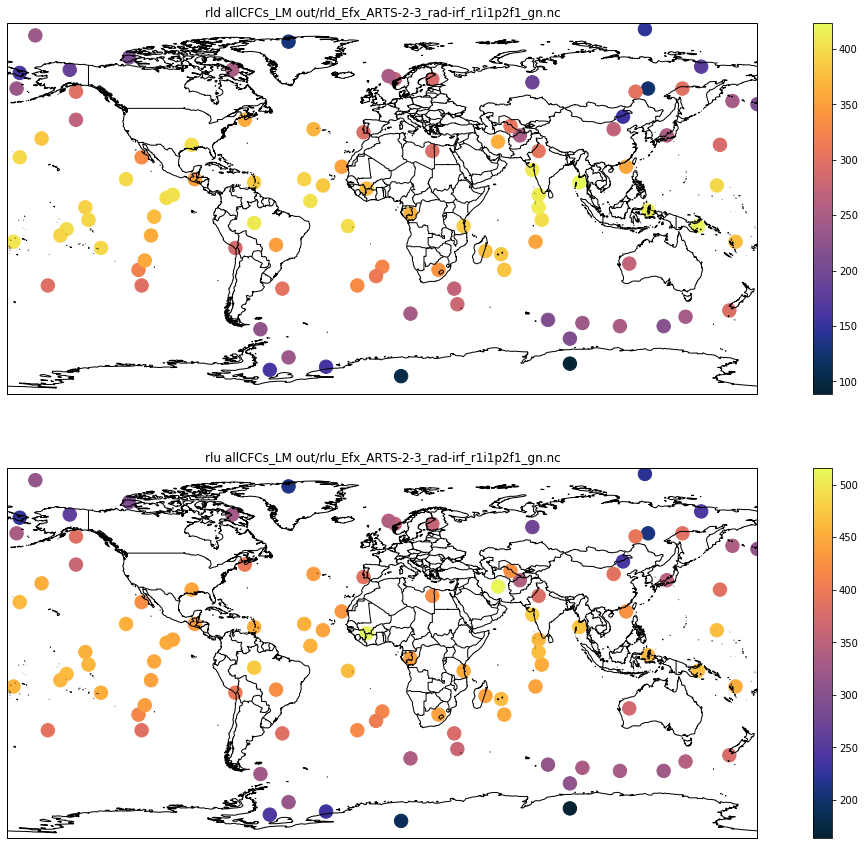

In [5]:
plot_file('allCFCs_LM')